In [6]:
import os
from glob import glob 
fonts = glob("fonts/**.ttf")
font_names = open("fonts/font_names.txt", 'r').read().splitlines()
print(font_names)

['ديواني جلي', 'ديواني مشكل', 'ديواني طويل', 'ديواني بسيط', 'كوفي بسيط', 'كوفي منحني', 'فارسي بسيط', 'مغربي اندلس', 'رقعة مدبب', 'رقعة بسيط', 'رقعة سريع', 'ثلث ديواني', 'ثلث بسيط', 'مربع بسيط', 'حر مدبب', 'حر بسيط', 'حر طويل', 'موبايلي', 'منجا', 'الجزيرة']


In [110]:
font_colors = ["black", "red", "blue", "purple", "green", "brown"]
font_colors_ar = ["اسود", "احمر", "ازرق", "بنفسجي", "اخضر", "بني"]

In [7]:
import json
with open('words_freq.txt', 'r') as f:
    data = json.load(f)
print(len(data))

398336


In [8]:
words = list(data.keys())
freqs = list(data.values())
total = sum(freqs)
freqs = [freq / total for freq in freqs]

In [189]:
from numpy.random import choice
from random import shuffle
def get_samples(max_words= 200_000):
    samples= choice(words, p = freqs, size =max_words,  replace = False)
    shuffle(samples)
    train_size = int(0.8 * max_words)
    test_eval_size  = (max_words - train_size)//2
    train_samples = samples[:train_size]
    valid_samples = samples[-2*test_eval_size:-test_eval_size]
    test_samples =  samples[-test_eval_size:]
    return train_samples, valid_samples, test_samples

In [190]:
train_samples, valid_samples, test_samples = get_samples()

In [191]:
train_samples[0], valid_samples[0], test_samples[0]

('وعدوان', 'لقنتني', 'يجتازه')

وعدوان - اخضر - مغربي اندلس


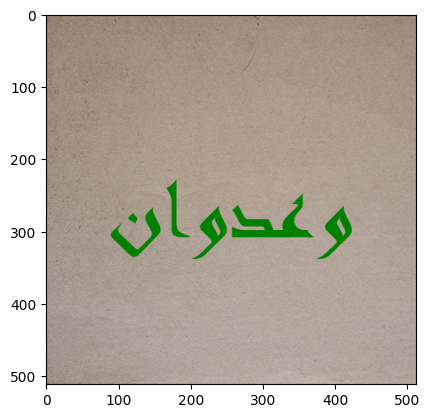

وعدوان - بني - موبايلي


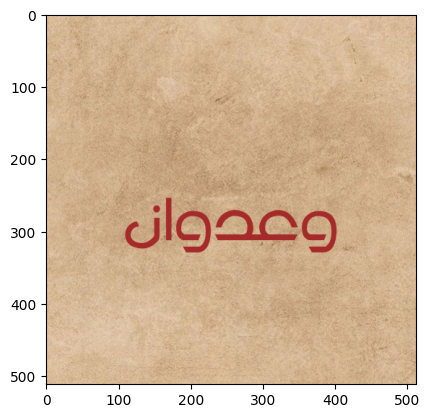

وعدوان - اسود - منجا


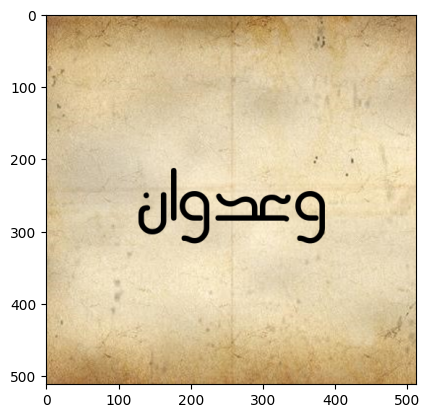

وعدوان - بنفسجي - رقعة مدبب


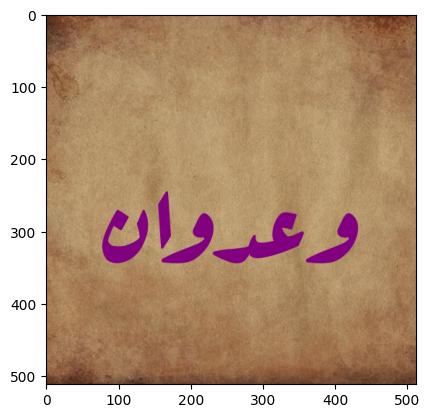

وعدوان - احمر - ثلث بسيط


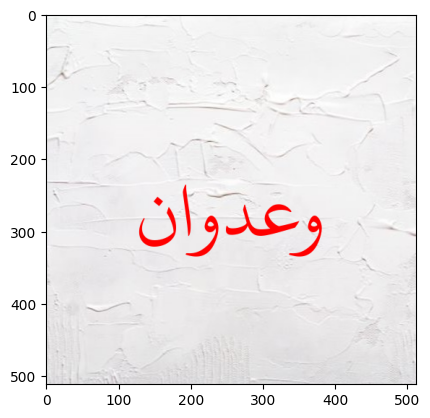

وعدوان - احمر - ديواني مشكل


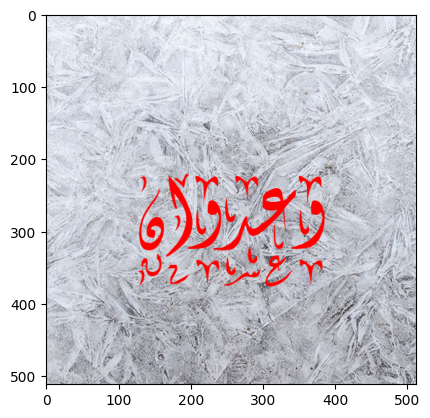

وعدوان - ازرق - ديواني جلي


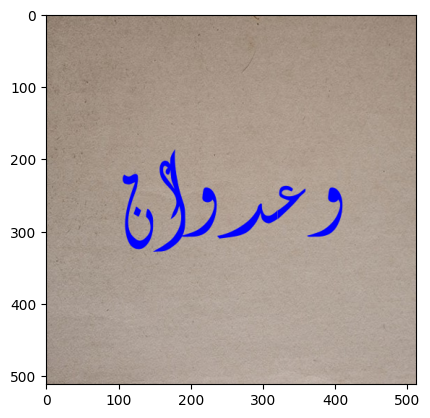

وعدوان - ازرق - حر مدبب


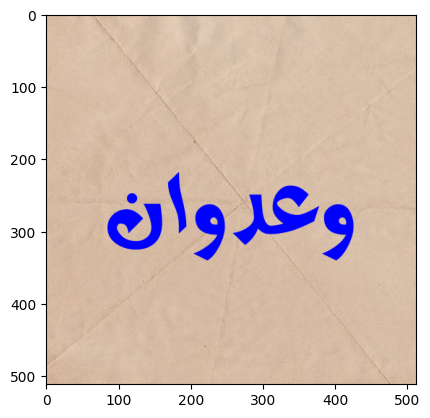

وعدوان - بنفسجي - رقعة سريع


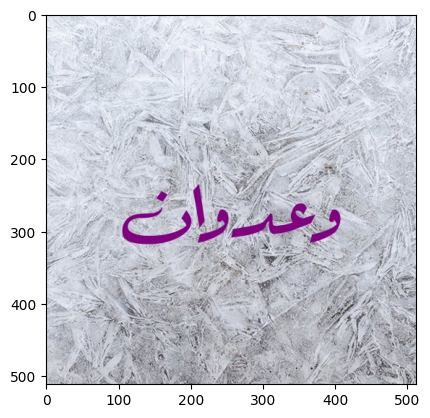

وعدوان - اسود - فارسي بسيط


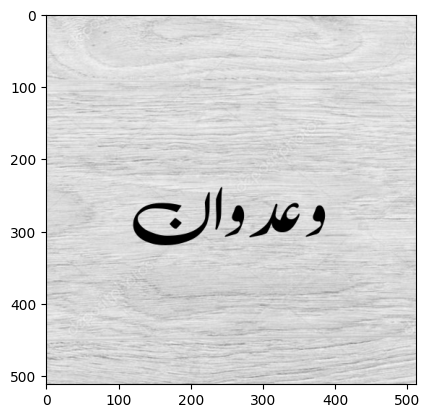

وعدوان - ازرق - ديواني طويل


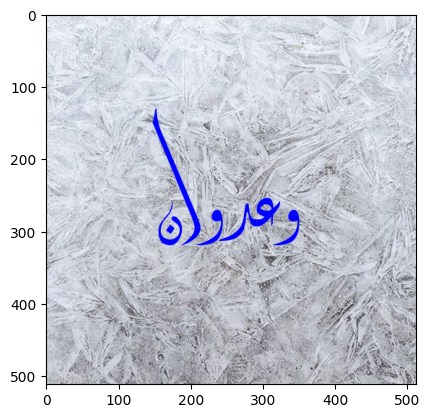

وعدوان - احمر - كوفي بسيط


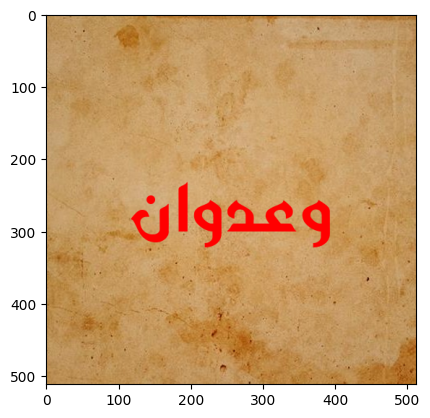

وعدوان - ازرق - كوفي منحني


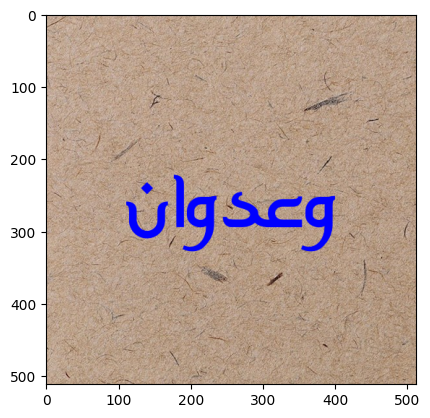

وعدوان - اسود - الجزيرة


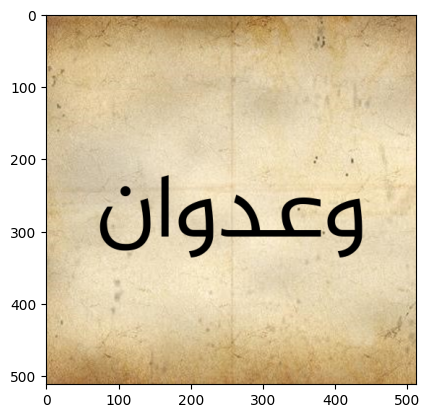

وعدوان - بنفسجي - حر طويل


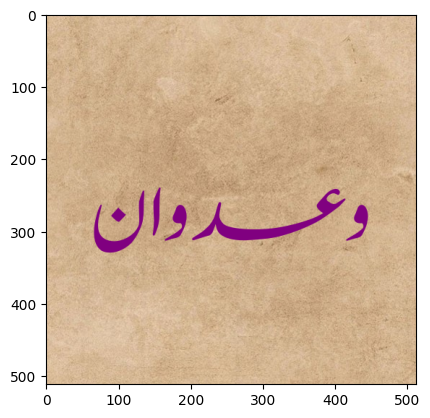

وعدوان - احمر - رقعة بسيط


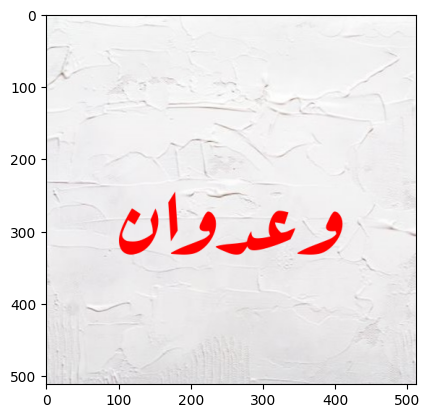

وعدوان - بني - ديواني بسيط


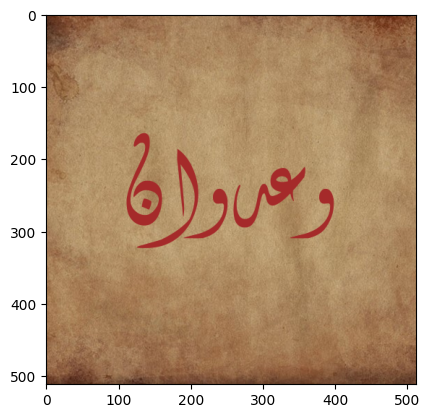

وعدوان - احمر - حر بسيط


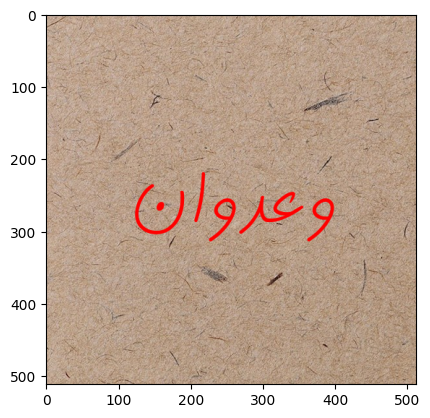

وعدوان - اخضر - مربع بسيط


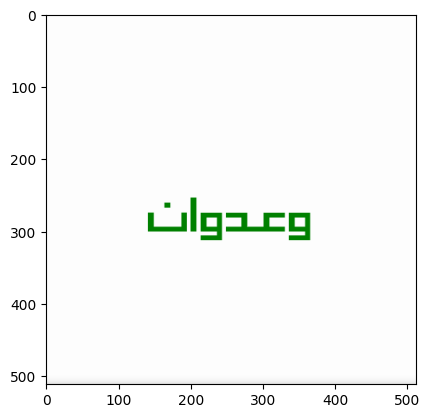

وعدوان - بني - ثلث ديواني


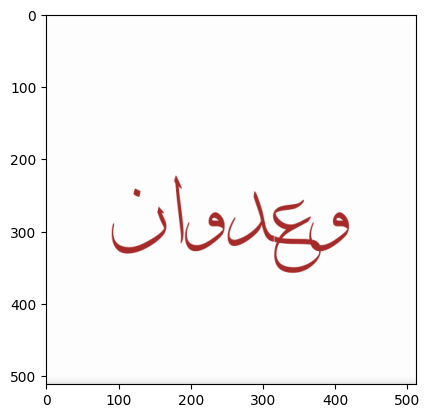

In [192]:
from PIL import Image
from PIL import ImageDraw
import matplotlib.pyplot as plt
from PIL import ImageFont
from IPython import display
import random
import numpy as np
# Open an Image

W, H = (512, 512)

for word in train_samples:
    for font_type in fonts:
        w, h = (512, 512)
        #choose background and resize
        bg = np.random.choice(glob('fonts-bgs/**.jpg'))
        img = Image.open(bg)
        img = img.resize((W, H))
        #choose a font color
        font_color = np.random.choice(font_colors)
        font_color_ar = font_colors_ar[font_colors.index(font_color)]
        #get font description
        font_name = font_names[int(font_type[6:-4]) - 1]
        #draw the font on the canvas given a premissable font size
        while w >= W or h >= H:
            font_size = random.randint(100, 150)
            font = ImageFont.truetype(f"{font_type}",font_size)
            # Call draw Method to add 2D graphics in an image
            draw = ImageDraw.Draw(img)
            _, _, w, h = draw.textbbox((0, 0), word, font=font)
        draw.text(((W-w)/2, (H-h)/2), word, font=font, fill=font_color) 
        #the prompt
        prompt = f"{word} - {font_color_ar} - {font_name}"
        print(prompt)
        img.save('tmp.png')
        plt.imshow(img)
        plt.show()
    break

In [76]:
draw.textbbox((0, 0), text = "hi")

(0, 0, 12, 11)